In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


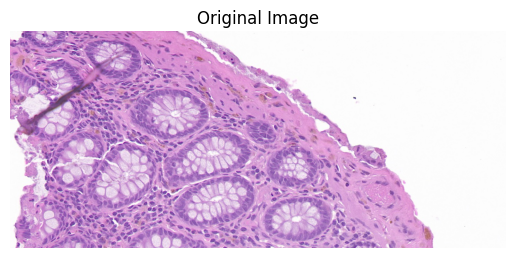

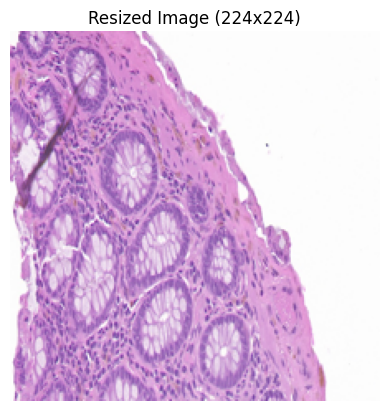

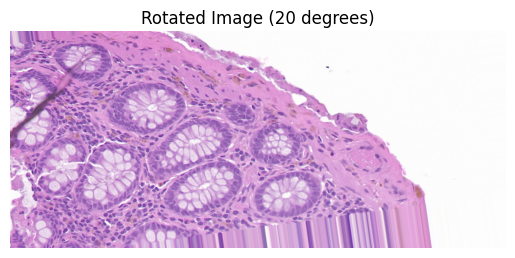

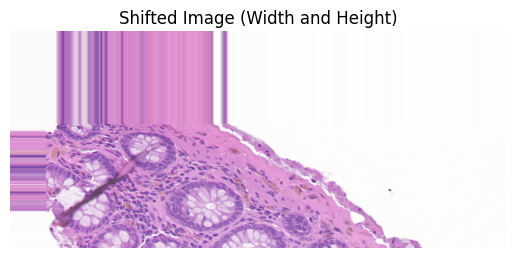

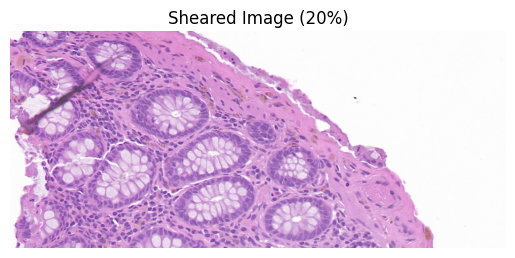

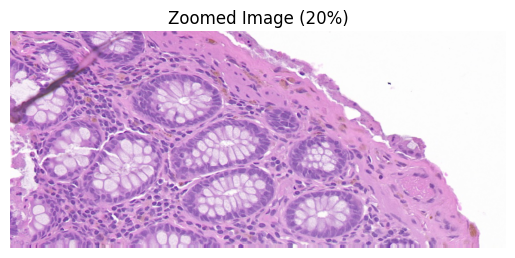

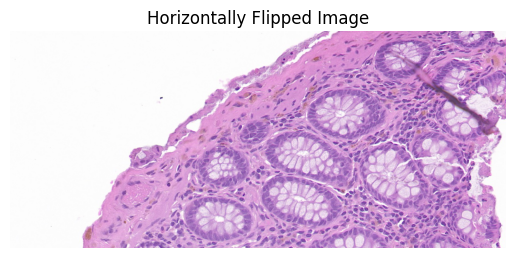

Found 1120 images belonging to 2 classes.
Found 280 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from tensorflow.keras.applications import EfficientNetV2B0, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Define paths
train_dir = '/content/drive/MyDrive/Thesis_Images/Train'
test_dir = '/content/drive/MyDrive/Thesis_Images/Test'

# Function to display an image
def display_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to apply and visualize individual augmentations
def apply_augmentation(image, augmentation):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)
    if augmentation:
        augmented_img = next(augmentation.flow(img_array, batch_size=1))[0]
    else:
        augmented_img = img_array[0]
    return augmented_img / 255.0  # Normalize to [0, 1] for display

# Load a sample image
sample_image_path = os.path.join(train_dir, 'Benign', os.listdir(os.path.join(train_dir, 'Benign'))[0])
sample_image = Image.open(sample_image_path)
display_image(sample_image, 'Original Image')


# Visualize rescaling (rescaling is applied in all other augmentations, so we skip separate rescaling visualization)

# Visualize resizing
resized_image = sample_image.resize((224, 224))
display_image(resized_image, 'Resized Image (224x224)')

# Visualize rotation
rotation_aug = ImageDataGenerator(rotation_range=20)
rotated_image = apply_augmentation(sample_image, rotation_aug)
display_image(rotated_image, 'Rotated Image (20 degrees)')

# Visualize width and height shift
shift_aug = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
shifted_image = apply_augmentation(sample_image, shift_aug)
display_image(shifted_image, 'Shifted Image (Width and Height)')

# Visualize shearing
shear_aug = ImageDataGenerator(shear_range=0.2)
sheared_image = apply_augmentation(sample_image, shear_aug)
display_image(sheared_image, 'Sheared Image (20%)')

# Visualize zooming
zoom_aug = ImageDataGenerator(zoom_range=0.2)
zoomed_image = apply_augmentation(sample_image, zoom_aug)
display_image(zoomed_image, 'Zoomed Image (20%)')

# Visualize horizontal flipping
flip_aug = ImageDataGenerator(horizontal_flip=True)
flipped_image = apply_augmentation(sample_image, flip_aug)
display_image(flipped_image, 'Horizontally Flipped Image')


